# Interpret a computer vision model with LIME

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions

import lime
from lime import lime_image

## Load model

In [2]:
model = MobileNetV2(include_top=True, weights='imagenet')

In [3]:
image = Image.open('../images/cat.jpg')
image = image.resize((224, 224), Image.ANTIALIAS)
image = np.array(image)

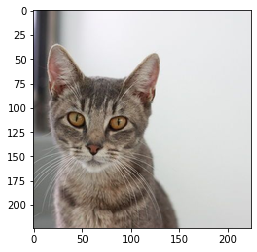

In [4]:
plt.imshow(image)

In [5]:
img = preprocess_input(np.expand_dims(image, axis=0))
img.shape

(1, 224, 224, 3)

In [6]:
preds = model.predict(img)
for x in decode_predictions(preds)[0]:
    print(x)

('n02123045', 'tabby', 0.43923274)
('n02124075', 'Egyptian_cat', 0.29194278)
('n02123159', 'tiger_cat', 0.118277095)
('n02127052', 'lynx', 0.0023928965)
('n02123597', 'Siamese_cat', 0.0020900823)


## Create LimeImageExplainer

In [7]:
%%time

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(img[0], model.predict, top_labels=5)

Wall time: 42.1 s


## Top Class (Tabby)

In [8]:
from skimage.segmentation import mark_boundaries

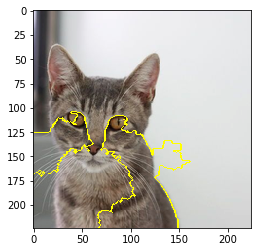

In [9]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(image, mask))

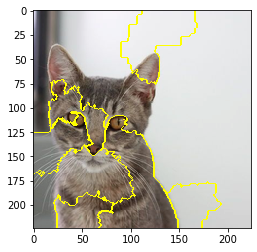

In [10]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(image, mask))